# Longest Common Subsequence

We will use the Longest Common Subsequence method to find out how strings of genes can be related. 

In [108]:
import random
import sys
import pandas as pd
import numpy as np

'''
Function to compute the length of the longest common subsequence
between 2 strings of genes
'''
def LCS_length(X,Y):
    m = len(X)
    n = len(Y)
    
    #construct table
    c = [[0 for _ in range(n+1)] for _ in range(m+1)]

    for i in range(m+1):
        for j in range(n+1):
            #if in first col and row
            if i == 0 or j == 0:
                c[i][j] = 0
            #if the values match
            #increment by 1
            elif X[i-1] == Y[j-1]: 
                c[i][j] = c[i-1][j-1] + 1
            
            #if they do not match, take the max
            #of the values in the row before, or the col before
            else: 
                c[i][j] = max(c[i-1][j], c[i][j-1])         
    
    #return the LCS
    return c[m][n]

In [109]:
'''
My sequences of genes
'''
a0 = 'CAGCGGGTGCGTAATTTGGAGAAGTTATTCTGCAACGAAATCAATCCTGTTTCGTTAGCTTACGGACTACGACGAGAGGGTACTTCCCTGATATAGTCAC'
a1 = 'CAAGTCGGGCGTATTGGAGAATATTTAAATCGGAAGATCATGTTACTATGCGTTAGCTCACGGACTGAAGAGGATTCTCTCTTAATGCAA'
a2 = 'CATGGGTGCGTCGATTTTGGCAGTAAAGTGGAATCGTCAGATATCAATCCTGTTTCGTAGAAAGGAGCTACCTAGAGAGGATTACTCTCACATAGTA'
a3 = 'CAAGTCCGCGATAAATTGGAATATTTGTCAATCGGAATAGTCAACTTAGCTGGCGTTAGCTTTACGACTGACAGAGAGAAACCTGTCCATCACACA'
a4 = 'CAGTCCGGCGTAATTGGAGAATATTTTGCAATCGGAAGATCAATCTTGTTAGCGTTAGCTTACGACTGACGAGAGGGATACTCTCTCTAATACAA'
a5 = 'CACGGGCTCCGCATCTATTTTGGGTCAAGTTGCATATCAGTCATCGACAATCAAACACTGTTTTGCGGTAGATAAGATACGACTGAGAGAGGACGTTCGCTCGAATATAGTTAC'
a6 = 'CACGGGTCCAATTTTGGAGTAAGTTGATATCGTCACGAAATCAATCCTGTTTCGGTAGTATAGGACTACGACGAGAGAGGACGTTCCTCTGATATAGTTAC'
a7 = 'GGTCCGTCAATTTTGGAGTAAGTTGATATCGTCACGAAATCAATCCTGTTTCGGTAGTATAGGACTACGACGAGAGAGGACGTTCCTCTGATATAGTTAC'
a8 = 'CACGGGAATCCGTCAATTTTGGAGTAAGTTGATATCGTCACGAAATCAATCCTGTTTCGGTAGTATAGGACTACGACGAGAGAGGACGTTCCTCTGATATAGTTAC'
a9 = 'CACGGGTCCGTCAATTTTGGAGTAAGTTGATATCGTCACGAAATCAATCCTGTTTCGGTAGTATAGGACTACGACGAGAGAGGACGTTCCTCTGATATAGTTAC'

arr = [a0,a1,a2,a3,a4,a5,a6,a7,a8,a9]

In [110]:
'''
Looking at all possible combinations of genes
We see that there are 45 combinations
'''
x = 0
for i in range(10):
    for j in range(10):
        if i !=j and i<j:
            print("\n",'String',i,'and string',j, \
                  'have the LCS of length:',LCS_length(arr[i],arr[j]))

            x+=1
print("\n The number of combs:",x)          


 String 0 and string 1 have the LCS of length: 74

 String 0 and string 2 have the LCS of length: 76

 String 0 and string 3 have the LCS of length: 73

 String 0 and string 4 have the LCS of length: 82

 String 0 and string 5 have the LCS of length: 84

 String 0 and string 6 have the LCS of length: 89

 String 0 and string 7 have the LCS of length: 87

 String 0 and string 8 have the LCS of length: 91

 String 0 and string 9 have the LCS of length: 91

 String 1 and string 2 have the LCS of length: 67

 String 1 and string 3 have the LCS of length: 72

 String 1 and string 4 have the LCS of length: 79

 String 1 and string 5 have the LCS of length: 71

 String 1 and string 6 have the LCS of length: 69

 String 1 and string 7 have the LCS of length: 68

 String 1 and string 8 have the LCS of length: 71

 String 1 and string 9 have the LCS of length: 71

 String 2 and string 3 have the LCS of length: 65

 String 2 and string 4 have the LCS of length: 69

 String 2 and string 5 have th

In [111]:
'''
Create a table with the gene sequences as columns 
and rows to see the combinations
'''
table = [[0 for _ in range(10)] for _ in range(10)]
for i in range(10):
    for j in range(10):
            table[i][j]= LCS_length(arr[i],arr[j])

Below, we can see a table showing the LCS between each possible gene combination. We note that the diagonal of the table (0 and 0, 1 and 1, etc) just have an LCS of the length of the string. We also note that half of the table is redundant since the LCS of 0 and 1 is the same as 1 and 0. To see the 45 unique LCS's see them printed out above.

In [115]:
'''
Display table nicely 
'''
mytable = pd.DataFrame({
                       "0":[x for x in table[0][:x]],
                         "1":[x for x in table[1][:x]],
                 "2":[x for x in table[2][:x]],
                 "3":[x for x in table[3][:x]],
                 "4":[x for x in table[4][:x]],
                 "5":[x for x in table[5][:x]],
                "6":[x for x in table[6][:x]],
                 "7":[x for x in table[7][:x]],
                 "8":[x for x in table[8][:x]],
                "9":[x for x in table[9][:x]]})

mytable

,0,1,2,3,4,5,6,7,8,9
0,100,74,76,73,82,84,89,87,91,91
1,74,90,67,72,79,71,69,68,71,71
2,76,67,97,65,69,82,82,81,84,84
3,73,72,65,96,80,72,68,67,69,69
4,82,79,69,80,95,74,74,73,75,75
5,84,71,82,72,74,114,95,93,97,97
6,89,69,82,68,74,95,101,97,101,101
7,87,68,81,67,73,93,97,100,100,100
8,91,71,84,69,75,97,101,100,106,104
9,91,71,84,69,75,97,101,100,104,104


# Genealogy

It must be noted that in this family of 10, we can draw relations with respect to the longest common subsequence. 


We make the observation that given a member $i$, the member is more closely related to member $j$ than to $k$ if the longest common subsequence between $i$ and $j$ is higher than between $i$ and $k$. 


Given *Set Strings* we know we have a family of 10. In a tree, the root node which we will call the great grandparent has 2 children called the grandparents. Each grandparent has 2 children called the parents, and one parent has 2 children called child whereas another parent has one child called child.


In the diagram below:

- $A1$ is the LCS between the great grandparent and the grandparent 
- $A2$ is the LCS between the great grandparent and the parent 
- $A3$ is the LCS between the great grandparent and the child

It must be noted that $A1$ > $A2$ > $A3$ since the great grandparent should be more closely related to the grandparent (its child) than to a parent (its grandchild) or a child (its great grandchild).




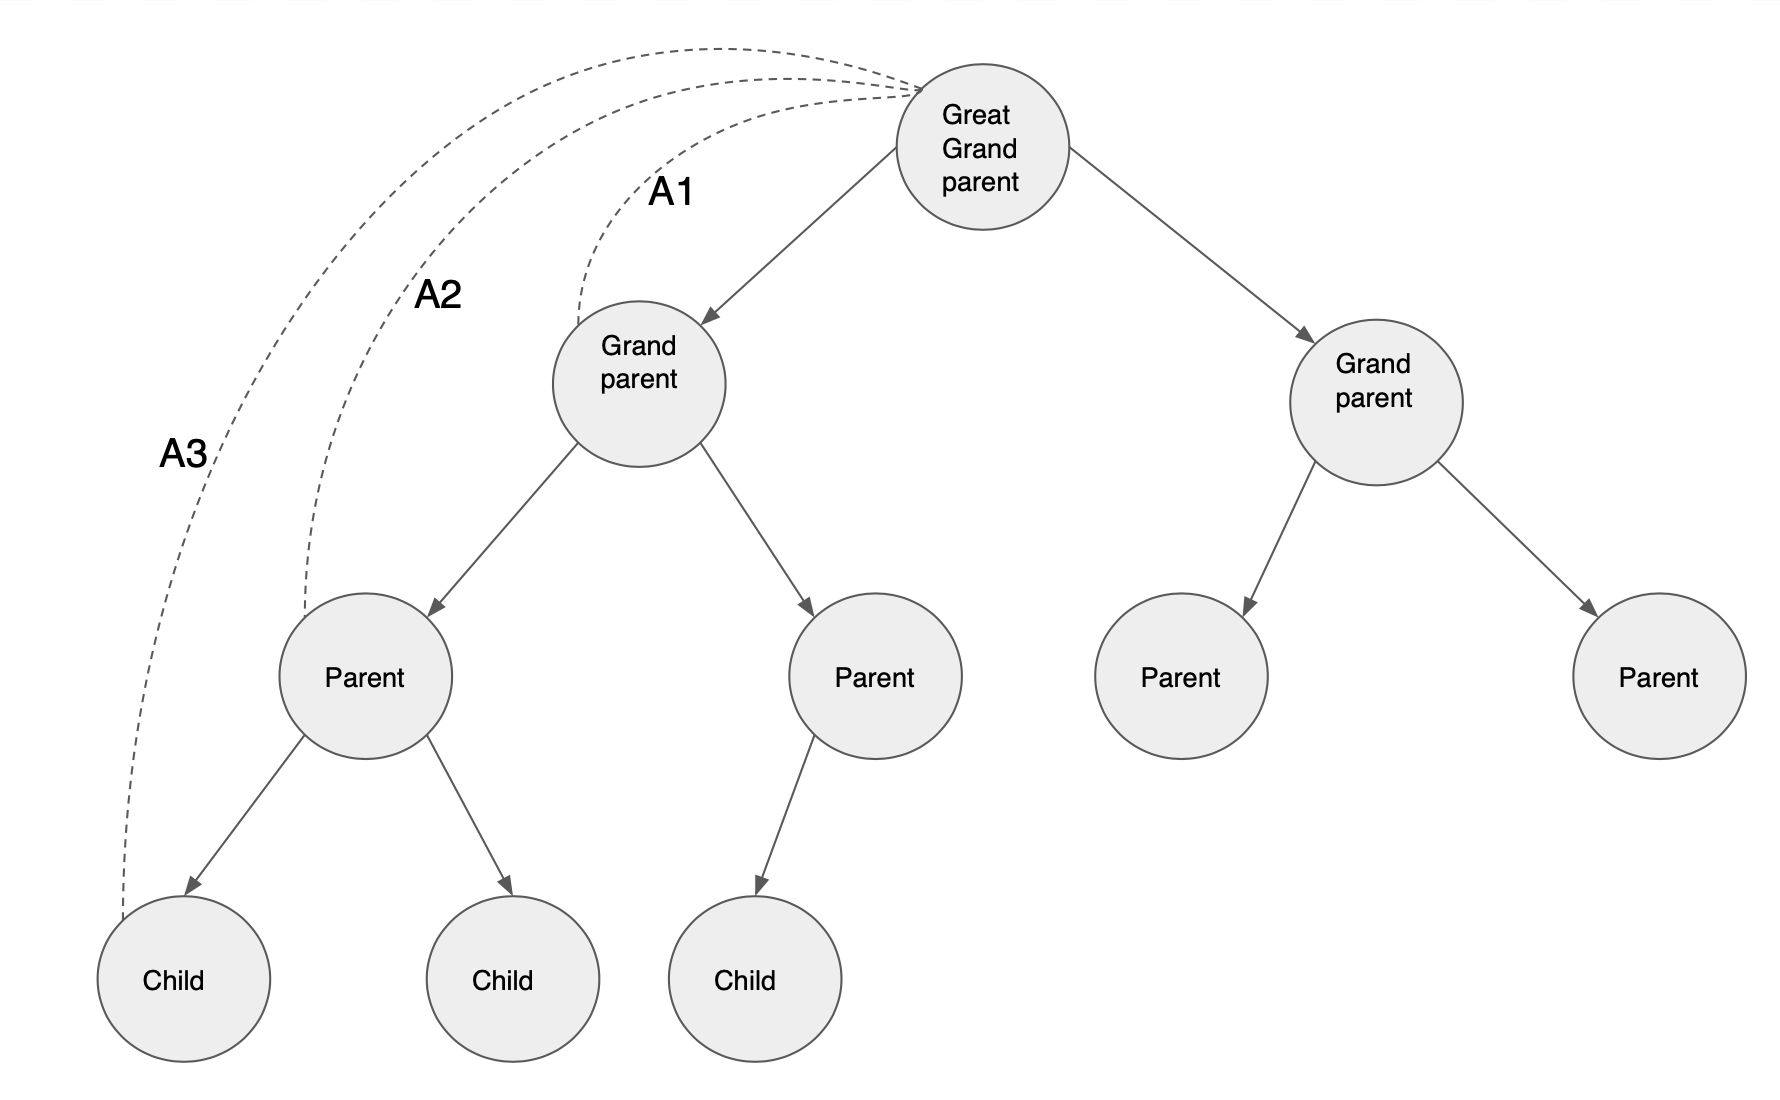

In [85]:
from IPython.display import Image
Image("tree.jpg")

## Code 

First, we need to define a class to create nodes. Each node has the attribute of having a parent, left child, right child, a key or value, and a name. The 2 functions below are simply to aid in drawing the trees when given a valid tree later.

In [86]:
'''
Write a function to take an input N strings
And then forms a binary tree which is valid for the relationship described above 
'''

'''
Creates a class to create nodes for geneology tree 
and display them
'''
class Node:
    
    #initialise each node to have a parent
    #left child, right child, and key value
    def __init__(self, key,name):
        self.l_child = None
        self.r_child = None
        self.parent = None
        self.key = key
        self.name = name
        
        
    #code to plot tree inspired by stackoverflow (2017) (cited at end)
    #this code is just assisting in visualising the trees like a package would
    def display(self):
        lines, _, _, _ = self._display_aux()
        for line in lines:
            print(line)
            
    def _display_aux(self):
       
        #if there are not any children
        if self.r_child is None and self.l_child is None:
            line = '%s' % self.key
            width = len(line)
            height = 1
            middle = width // 2
            return [line], width, height, middle

        #if there is only a l child.
        if self.r_child is None:
            lines, n, p, x = self.l_child._display_aux()
            s = '%s' % self.key
            u = len(s)
            first_line = (x + 1) * ' ' + (n - x - 1) * '_' + s
            second_line = x * ' ' + '/' + (n - x - 1 + u) * ' '
            shifted_lines = [line + u * ' ' for line in lines]
            return [first_line, second_line] + \
            shifted_lines, n + u, p + 2, n + u // 2

        #if only a r child.
        if self.l_child is None:
            lines, n, p, x = self.r_child._display_aux()
            s = '%s' % self.key
            u = len(s)
            first_line = s + x * '_' + (n - x) * ' '
            second_line = (u + x) * ' ' + '\\' + (n - x - 1) * ' '
            shifted_lines = [u * ' ' + line for line in lines]
            return [first_line, second_line] + \
            shifted_lines, n + u, p + 2, u // 2

        #if there are both children
        left, n, p, x = self.l_child._display_aux()
        right, m, q, y = self.r_child._display_aux()
        s = '%s' % self.key
        u = len(s)
        first_line = (x + 1) * ' ' + (n - x - 1) * '_' \
        + s + y * '_' + (m - y) * ' '
        second_line = x * ' ' + '/' + (n - x - 1 + u + y) \
        * ' ' + '\\' + (m - y - 1) * ' '
        if p < q:
            left += [n * ' '] * (q - p)
        elif q < p:
            right += [m * ' '] * (p - q)
        zipped_lines = zip(left, right)
        lines = [first_line, second_line] + \
        [a + u * ' ' + b for a, b in zipped_lines]
        return lines, n + m + u, max(p, q) + 2, n + u // 2    

Now, we need a function to insert nodes into our tree. This function ensures that each node has 2 children before and that we have a balanced left and right tree. It runs in $O(n)$ time (n is the number of nodes in the tree) because of the conditional statement in the code

In [87]:
'''
So we have the LCSs of each combo stored in a table 
We need to choose a root node and insert it
Then we need to look at the LCS's with that root node
And construct a valid tree 
'''

'''
so lets say a3 is the root node 
then we need to have the column with a3 as our Longest common subsequences
then we need to sort these LCS's
and insert them into the tree according to the relationship
in the diagram '''

#function to insert node 
def insert(lis, root, i, n,name): 

    if i < n: 
        
        #temporarily use the ith element 
        #in the list as the root
        store = Node(lis[i],names[i])  
        root = store  
  
        #recursive call when we need to insert a left child
        #because eacch node has 2 children we use 2i+1 
        #much like them we construct binary heaps
        root.l_child = insert(lis, root.l_child,  2*i+1, n,name)  
  
        #recursive call when we need to insert a right child
        #we use 2i+2 now so it is the ones that are NOT left
        root.r_child = insert(lis, root.r_child, 2*i+2, n,name) 
    return root 

The *sort_tree* function serves the purpose of creating valid trees. Given a root, it extracts the relevant column from our LCS table and sorts the LCS's in descending order, ensuring the root will be in the front. It keeps track of the LCS's and the names of the nodes so that both trees can be displayed. Once it has the order of the nodes, it calls on our *insert* function to create the trees both with values and with names. The function sorts a list using *sorted* which takes $O(n)$ time, where $n$ is the number of nodes. It also calls on *insert* twice which would take $O(n)$ time each (as discussed above). The 2 for loops both run in $O(n)$ time. Our function comprises of  $O(n) + 2O(n) + 2O(n) = cO(n) = O(n)$

In [97]:
#function to sort my list in descending order
#to meet the tree properties described in my diagram

def sort_tree(table, column,name):
    
    #store my longest common subsequences
    mylcss = []
    
    #i get them from a specific column in the table
    #the column is the root node we choose 
    for i in range(len(table[column][:])):
        mylcss.append([table[column][i],i])
    
    #now we make syre the root node is the smallest element
    mylcss[column][0] = -sys.maxsize
    mylcss
    #we sort according to LCS with the root node at the end
    #and pop off the root node
    mylcss= sorted(mylcss, key=lambda x: x[0], reverse = True)
    mylcss.pop()

    #this preserves the indices of the elements although 
    #we sorted them
    indices= [mylcss[i][1] for i in range(len(mylcss))]
    
    #add the column'th element to indices and to my clss
    treeorder = []
    namesorder = []
    for j in range(len(table[column][:])):
        #the root must be the element whose column we chose 
        #since max LCS will be between the element and itself
        if j == 0:
            treeorder.append(table[column][column])
            namesorder.append(name[column])
            
        #otherwise lets append everything else in the same sorted
        #order we had previously
        else:
            k = indices.pop(0)
            #fetch from table according to indices stored
            treeorder.append(table[k][column])
            namesorder.append(name[k])
            
    
    #create the tree
    #by inserting the ordered nodes we found in
    #tree order
    my_tree=None
    my_tree=insert(treeorder,my_tree,0,len(treeorder),name)
    tree_names = None
    tree_names = insert(namesorder,tree_names,0,len(namesorder),name)
    
    #return the tree and the order of the tree
    return treeorder, my_tree, tree_names
 
names = ['s0','s1','s2','s3','s4','s5','s6','s7','s8','s9']
sort_tree(table, 9,names)

treeorder,tree1,tree2=sort_tree(table,9,names)
tree1.display()
tree2.display()

         _____104___    
        /           \   
    ___104___      101_ 
   /         \    /    \
  100_      97   91   84
 /    \    /            
75   71   69            
        ____s9___   
       /         \  
    __s8___     s6_ 
   /       \   /   \
  s7_     s5  s0  s2
 /   \   /          
s4  s1  s3          


Now, we have a function which can take a root node as an input and return a valid family tree according to the relationship described above. But which valid tree is the best tree? Which tree makes the 'most related' family?


If we divide each column in our LCS table by the length of the gene corresponding to that column we can figure out the percentage of how related the two genes are.

We can see the diagonals are each 1, because the LCS of a gene and itself, is 100% the same as the gene itself.

In [89]:
table2 = [[0 for _ in range(10)] for _ in range(10)]
for i in range(10):
    diag = LCS_length(arr[i],arr[i])
    for j in range(10):
        table2[i][j]= LCS_length(arr[i],arr[j])/diag
                 
'''
Display table nicely 
'''
mytable2 = pd.DataFrame({
                       "0":[x for x in table2[0][:x]],
                         "1":[x for x in table2[1][:x]],
                 "2":[x for x in table2[2][:x]],
                 "3":[x for x in table2[3][:x]],
                 "4":[x for x in table2[4][:x]],
                 "5":[x for x in table2[5][:x]],
                "6":[x for x in table2[6][:x]],
                 "7":[x for x in table2[7][:x]],
                 "8":[x for x in table2[8][:x]],
                "9":[x for x in table2[9][:x]]})

mytable2

,0,1,2,3,4,5,6,7,8,9
0,1.00,0.822222,0.783505,0.760417,0.863158,0.736842,0.881188,0.87,0.858491,0.875000
1,0.74,1.000000,0.690722,0.750000,0.831579,0.622807,0.683168,0.68,0.669811,0.682692
2,0.76,0.744444,1.000000,0.677083,0.726316,0.719298,0.811881,0.81,0.792453,0.807692
3,0.73,0.800000,0.670103,1.000000,0.842105,0.631579,0.673267,0.67,0.650943,0.663462
4,0.82,0.877778,0.711340,0.833333,1.000000,0.649123,0.732673,0.73,0.707547,0.721154
5,0.84,0.788889,0.845361,0.750000,0.778947,1.000000,0.940594,0.93,0.915094,0.932692
6,0.89,0.766667,0.845361,0.708333,0.778947,0.833333,1.000000,0.97,0.952830,0.971154
7,0.87,0.755556,0.835052,0.697917,0.768421,0.815789,0.960396,1.00,0.943396,0.961538
8,0.91,0.788889,0.865979,0.718750,0.789474,0.850877,1.000000,1.00,1.000000,1.000000
9,0.91,0.788889,0.865979,0.718750,0.789474,0.850877,1.000000,1.00,0.981132,1.000000


To see which tree is the best tree, I will define the best tree as the tree in which the percentage of relatedness throughout the column is the highest.

In [90]:
#function to find a tree which is most related given 
#a table with percentage relations and names of columns

def most_related(tablea, name):
    
    #initialise
    maxi = -sys.maxsize
    bestroot = sys.maxsize
    
    #for each column in our table
    for i in range(len(name)):
        #get a valid family tree
        treeorder,tree1,tree2 = sort_tree(tablea, i, name)
        #if the percentage sums are higher this is our new 
        #most related tree
        #so update our values
        if sum(treeorder[1:]) > maxi:
            maxi = sum(treeorder[1:])
            bestroot = i
            
    print("The best tree is the tree with root",bestroot)
        
most_related(table2, names)    

The best tree is the tree with root 8


In [96]:
#so lets look at tree 8
treeorder,tree1,tree2=sort_tree(table2,8,names)
names = ['s0','s1','s2','s3','s4','s5','s6','s7','s8','s9']

tree2.display()

        ____s8___   
       /         \  
    __s9___     s6_ 
   /       \   /   \
  s7_     s5  s0  s2
 /   \   /          
s4  s1  s3          


## Probability of Insertion, Deletion, and Mutation

Let $I$ be the number of insertions
Let $D$ be the number of deletions
Let $M$ be the number of mutations
Let $E$ be the number of minimum edits to go from one string to another 

We can come up with equations to relate the length of the parent (P), the length of the child (C), the longest common subsequence (LCS), $I$, $M$, and $D$.

Let us note how insertions, deletions and mutations change $C$ and $LCS$:
- Insertion: The child is one unit longer than the parent (C = P+1), the LCS is unchanged
- Deletion: The child is one unit less than the parent (C = P-1), the LCS is decreased by 1
- Mutation: The child is the same length as the parent (C = P), the LCS is decreased by 1

These assumptions and observations result in the following equations:

$C = P + I - D$

$LCS = P - D - M$


The *minimum number of edits* method is a method used to figure out the smallest amount of edits to change from one string to another. We will make the assumption that the minimum number of edits occurs in gene mutations. For example if we have "ACG" which changes to "ACGA" we will assume there was 1 insertion of "A" and not that there were multiple insertions, deletions, and mutations which have 'cancelled out.'


Now, we need to write a function to compute the minimum number of edits to go from a parent string to a child string. 

To do this, we can use dynamic programming. We construct a table to keep track of the minimum number of edits for small strings $i$ and $j$ and then use these solutions to the smaller subproblems to solve for larger values of $i$ and $j$

Below is an example of a table for a 2 small strings "ACGT" and "ACC." We can see that at a minimum, "T" was deleted and "G" mutated into a "C" giving us a minimum edits number of 2, but we will see how this plays out in the table.

Constructing the table works as follows:

For each row, compare the row entry to each column entry.
We then have 4 options:

1) If the column number and row number are zero, either set the first entry to zero or one depending on if they match

2) If we are in the first row, but not first column, just add one from the cell to the left (we are remembering the values in the previous cell in the table to avoid recomputation)

3) If we are in the first column but not the first row, just add one from the cell above

4) If we are in any other cell, add one to the smallest number in the surrounding cells (the one above, to the left, or left diagonally above) This ensures the minimum number of edits is found in the bottom right cell

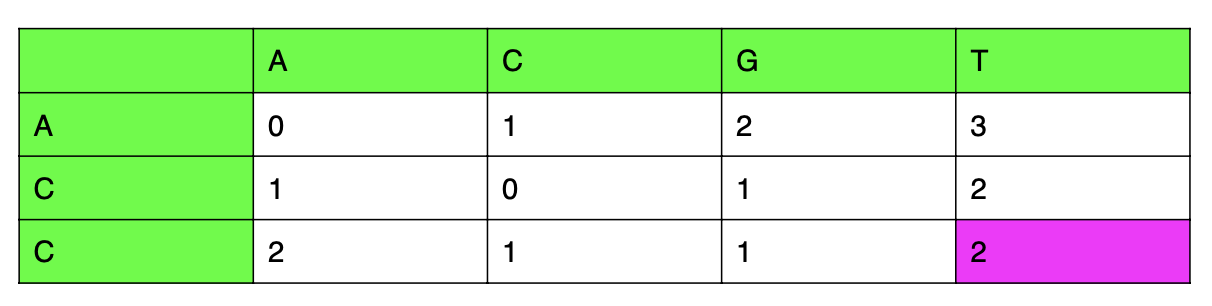

In [105]:
Image("table.jpg")

In [103]:
'''
Function to compute the minimium number of edits to
get from parent to child 
'''

def minimum_edits(p,c): 
    
    #create a table with the dimensions of the lengths of the parent 
    #and the child string 
    #initialise to zero in each entry 
    m= len(p) 
    n= len(c) 
    tab = [[0 for i in range(m)] for i in range(n)]
    
    for i in range(n):
        for j in range(m):
            
            #STATE 1
            #the first column and the first row 
            if (i == 0 and j == 0):
                
                #if the values are the same, the min edit is still zero
                if (p[0] == c[0]):
                    tab[i][j] = 0
                
                #but if they are different we need to make an edit
                else:
                    tab[i][j] = 1
                    
            #STATE 2
            #when its the first row, but not the first column
            #increment by 1 as we parse 
            elif i == 0:
                tab[i][j] = tab[i][j - 1] + 1
                
            #STATE 3
            #when it is the first column but not first row
            #increment by 1 as we parse
            elif j == 0:
                tab[i][j] = tab[i-1][j] + 1
            
            
            #STATE 4
            #when its all the other columns and rows 
            else:
                
                #if the elements are the same
                #we do not increase the min number of edits
                if p[j] == c[i]:
                    tab[i][j] = tab[i-1][j-1]
                
                #but if they are different, 
                #we increase the min edits by 1
                #we do this by increasing the minimum of the surrounding cells
                else:
                    tab[i][j] = min(tab[i][j-1], tab[i-1][j],tab[i-1][j-1])+1
    
    
    #return the bottom element of the table 
    return tab[-1][-1]

minimum_edits("ACGT","ACC")

2

In [93]:
table3 = [[0 for _ in range(10)] for _ in range(10)]

for i in range(10):
    
    for j in range(10):
        table3[i][j]= minimum_edits(arr[i],arr[j])

'''
Display table nicely 
'''
mytable3 = pd.DataFrame({
                       "0":[x for x in table3[0][:x]],
                         "1":[x for x in table3[1][:x]],
                 "2":[x for x in table3[2][:x]],
                 "3":[x for x in table3[3][:x]],
                 "4":[x for x in table3[4][:x]],
                 "5":[x for x in table3[5][:x]],
                "6":[x for x in table3[6][:x]],
                 "7":[x for x in table3[7][:x]],
                 "8":[x for x in table3[8][:x]],
                "9":[x for x in table3[9][:x]]})

mytable3

,0,1,2,3,4,5,6,7,8,9
0,0,35,34,41,25,36,20,24,21,19
1,35,0,42,31,19,52,43,43,45,43
2,34,42,0,45,38,38,25,27,25,23
3,41,31,45,0,24,52,48,47,49,47
4,25,19,38,24,0,48,39,38,41,39
5,36,52,38,52,48,0,23,26,22,21
6,20,43,25,48,39,23,0,6,5,3
7,24,43,27,47,38,26,6,0,7,5
8,21,45,25,49,41,22,5,7,0,2
9,19,43,23,47,39,21,3,5,2,0


Now, we have a function which computes the minimum number of edits. How do we use this to compute the probability of insertion, deletion, and mutation?

We make the observation that the sum of insertions, deletions, and mutations will equal the minimum number of edits such that:


$E = I+D+M$

Now we have 3 equations:


- $C = P + I - D$

- $LCS = P - D - M$

- $E = I+D+M$


We know the length of the parent (P), the length of the child (C), the LCS between them, and now we have computed the minimum number of edits (E). 

We have 3 unknown variables, $I$, $D$, and $M$ and we have 3 equations so we can solve for these variables 

In [94]:
#function to solve the system of equations 

#a is the list of lists including [LCS,P,C,E]
def changes(a):
    
    LCS = a[0]
    P = a[1]
    C = a[2]
    E = a[3]
    
    #our system of equations with 3 unknowns 
    D = E - C + LCS
    I = D + C - P
    M = P - LCS - D
    return D/P, I/P, M/P

We will compute the probabilities with our tree rooted at 8, which we deemed to be a good example of a related family tree.

In [95]:
dele = []
inse = []
muta = []


#we will use parent child values from our tree rooted at 8
#8 and 9, 8 and 6, 9 and 7, 9 and 5, 6 and 0, 6 and 2, 7 and 4, 7 and 1, 5 and 3
check = [[104,106,104,2],[101,106,101,5],[100,104,100,5],[97,104,114,21],\
         [89,101,100,20],[82,101,97,25],[73,100,95,38],[68,100,90,43],[72,114,96,52]]


for i in check:

        #append all the probs of insertion, deletion, and mutation
        x,y,z= changes(i)
        dele.append(x)
        inse.append(y)
        muta.append(z)

#take the means
d = np.mean(dele)
i = np.mean(inse)
m = np.mean(muta)
     
print('The probability of deletion is:',d*100,"%")

print('The probability of insertion is:',i*100,"%")

print('The probability of mutation is:',m*100,"%")

The probability of deletion is: 10.625656048404728 %
The probability of insertion is: 6.561821431805799 %
The probability of mutation is: 5.342774088474974 %


## Strengths and Weaknesses

This approach is strong in the following ways:

- The LCS allows for mutations, insertions, and deletions, since the common substrings do not have to line up

- My approach attempts to find the best version of a tree by looking at percentage of relatedness. Although this could be improved upon by perhaps using some measure of standard deviation from the root string, it makes a good effort to improve on the original code which takes any family tree.

- To find the minimum number of edits and then the probabilities and we use dynamic programming which decreases runtime to $O(nlogn)$ and avoids unnecessary re-computations 



This approach has room for improvement:

- In reality, each child has 2 parents, a mother and a father, so to make it realistic, we could account for a child being a combination of the genes of 2 parents.

- I call *insert* twice to get the names of the nodes and the values of the nodes. It would be more efficient to call it once with the names attatched to their respective values

- The longest common subsequence approach does not account for contagious strings and I think that having more genes in common in continuously long strings is also a meaningful measure, so perhaps an improvement could be adding a weight to longer contagious strings to give them more value

## HCs

**#probability:** I computed the probability of insertion, deletion, and mutation from a given sample of strings. Instead of using Bayesian formula's, I used metrics of relatedness such as minimum number of edits to come up with an estimate for the number of insertions, deletions, and mutations for the given sample. I could then divide these by the length of the parent to come up with a probability. Finding a probability i

**#breakitdown:** In my my dynamic programming algorithm to find the minimum number of edits, I break down the problem into 4 cases or states. The table I drew with the shorter words really helped me to figure out what these 4 states were (if first column and first row, if just first column, if just first row, or if anything else). In this way, I broke the problem down on 2 levels: by using shorter strings to figure out the 4 substates.


## References 

GeeksforGeeks. (2019, February 18). Construct a complete binary tree from given array in level order fashion. Retrieved April 15, 2019, from https://www.geeksforgeeks.org/construct-complete-binary-tree-given-array/

Stanford. (n.d.). Minimum Edit Distance. Retrieved April 15, 2019, from https://web.stanford.edu/class/cs124/lec/med.pdf?fbclid=IwAR0v8y0SWRdMCJG0t1NR9Lk26CfY4-TkNbB8qT_MJtTRjrJRRxV6jBjGr1Y

User2762315user2762315 35115, Juan Carlos CotoJuan Carlos Coto 4, J. V.J. V. 8826, Emad MokhtarEmad Mokhtar 2, & Prashant ShuklaPrashant Shukla 419314. (2019, January 7). Print binary tree level by level in python. Retrieved April 15, 2019, from https://stackoverflow.com/questions/34012886/print-binary-tree-level-by-level-in-python